# Fraud Check on Decision Tree


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
fraud=pd.read_csv("Fraud_check.csv")

In [3]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
label_encoder=preprocessing.LabelEncoder()
fraud['Urban']=label_encoder.fit_transform(fraud['Urban'])

In [5]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,1
1,YES,Divorced,33700,134075,18,1
2,NO,Married,36925,160205,30,1
3,YES,Single,50190,193264,15,1
4,NO,Married,81002,27533,28,0
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,1
596,YES,Divorced,69967,55369,2,1
597,NO,Divorced,47334,154058,0,1
598,YES,Married,98592,180083,17,0


In [6]:
label_encoder=preprocessing.LabelEncoder()
fraud['Marital.Status']=label_encoder.fit_transform(fraud['Marital.Status'])
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,2,68833,50047,10,1
1,YES,0,33700,134075,18,1
2,NO,1,36925,160205,30,1
3,YES,2,50190,193264,15,1
4,NO,1,81002,27533,28,0
...,...,...,...,...,...,...
595,YES,0,76340,39492,7,1
596,YES,0,69967,55369,2,1
597,NO,0,47334,154058,0,1
598,YES,1,98592,180083,17,0


In [7]:
label_encoder=preprocessing.LabelEncoder()
fraud['Undergrad']=label_encoder.fit_transform(fraud['Undergrad'])
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [8]:
fraud1=fraud.copy()
fraud1["income"]="=<30000"
fraud1.loc[fraud1["Taxable.Income"]>=30000,"income"]="Good"
fraud1.loc[fraud1["Taxable.Income"]<=30000,"income"]="Risky"
fraud1 

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [9]:
fraud2=fraud1.drop(['Taxable.Income'],axis=1)
fraud2

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


In [10]:
x=fraud2.iloc[0:,0:4]
y=fraud2["income"]

In [11]:
y 

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: income, Length: 600, dtype: object

In [12]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=40)

In [13]:
x_train, x_test, y_train, y_test

(     Undergrad  Marital.Status  City.Population  Work.Experience
 332          1               0            84132                1
 13           0               1            86649               16
 274          1               1           112584               25
 257          1               1            31611               17
 112          1               2           193038               26
 ..         ...             ...              ...              ...
 440          0               2           170407               13
 165          1               1            38463               23
 7            1               2           131253                3
 219          1               0            26814                9
 326          1               0           165001               19
 
 [480 rows x 4 columns],
      Undergrad  Marital.Status  City.Population  Work.Experience
 159          1               2            28504                1
 307          0               0            31819 

In [14]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3.0)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3.0)

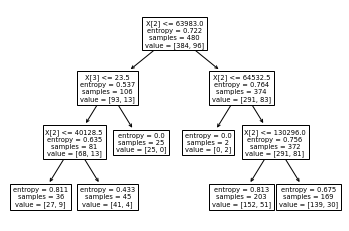

In [15]:
tree.plot_tree(model);

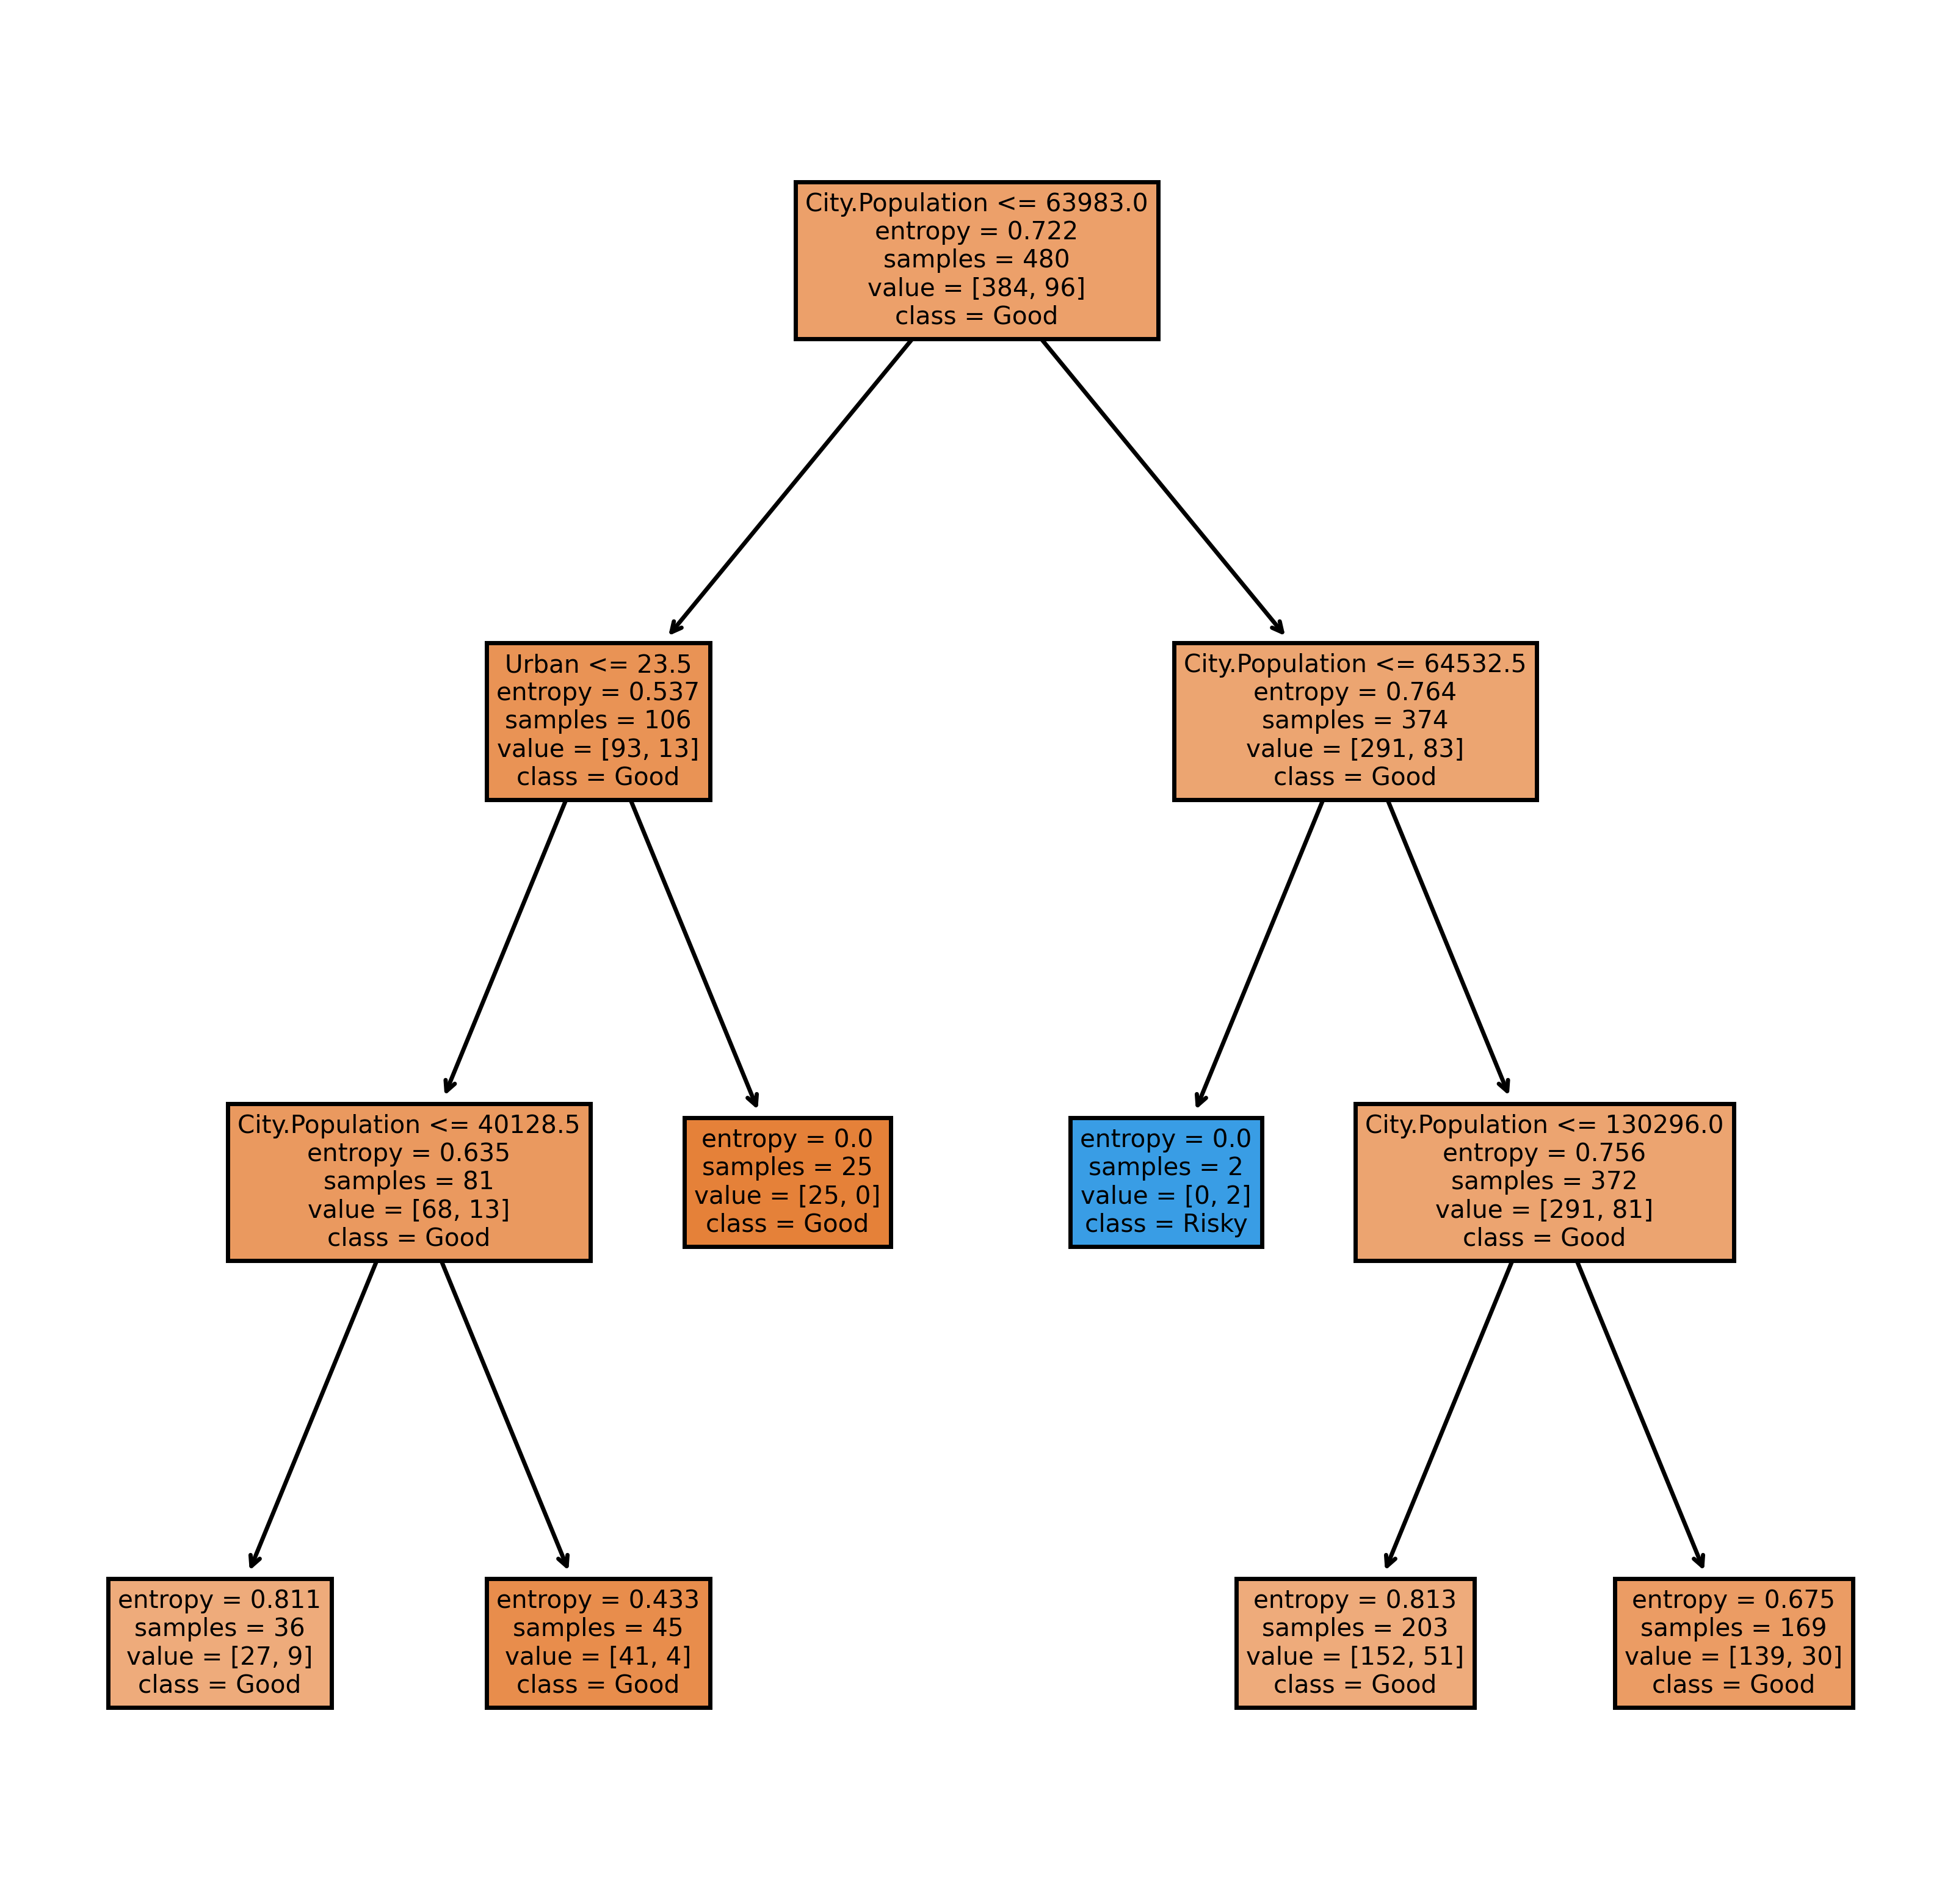

In [16]:
fn=['Undergrad','Marital.Status','City.Population','Urban','Work.Experience']
cn=['Good','Risky']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,8), dpi=500)
tree.plot_tree(model,
              feature_names = fn,
              class_names = cn,
              filled = True);

In [17]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

Good    120
dtype: int64

In [18]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [19]:
pd.crosstab(y_test,preds)

col_0,Good
income,
Good,92
Risky,28


In [20]:
np.mean(preds==y_test)

0.7666666666666667

# Building Decission Tree(CART) using Gini Criteria

In [21]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [22]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [23]:
preds=model.predict(x_test)

In [24]:
y_test

159     Good
307     Good
253     Good
528     Good
137    Risky
       ...  
102     Good
577     Good
18      Good
560     Good
62      Good
Name: income, Length: 120, dtype: object

# COMPANY__DATA   (Part 2) 

In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [26]:
data=pd.read_csv("Company_Data.csv")

In [27]:
data 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [28]:
data=pd.get_dummies(data,columns=['US','Urban','ShelveLoc'])
data 

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,US_No,US_Yes,Urban_No,Urban_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,0,1,0,1,1,0,0
1,11.22,111,48,16,260,83,65,10,0,1,0,1,0,1,0
2,10.06,113,35,10,269,80,59,12,0,1,0,1,0,0,1
3,7.40,117,100,4,466,97,55,14,0,1,0,1,0,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,1,0,1,0
396,6.14,139,23,3,37,120,55,11,0,1,1,0,0,0,1
397,7.41,162,26,12,368,159,40,18,0,1,0,1,0,0,1
398,5.94,100,79,7,284,95,50,12,0,1,0,1,1,0,0


In [29]:
data["sales"]="small"
data.loc[data["Sales"]>7.49,"sales"]="large"
data.drop(["Sales"],axis=1,inplace=True)

In [30]:
x=data.iloc[:,0:14]
y=data.iloc[:,14]

In [35]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,US_No,US_Yes,Urban_No,Urban_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,276,120,42,17,0,1,0,1,1,0,0
1,111,48,16,260,83,65,10,0,1,0,1,0,1,0
2,113,35,10,269,80,59,12,0,1,0,1,0,0,1
3,117,100,4,466,97,55,14,0,1,0,1,0,0,1
4,141,64,3,340,128,38,13,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,1,0,1,0
396,139,23,3,37,120,55,11,0,1,1,0,0,0,1
397,162,26,12,368,159,40,18,0,1,0,1,0,0,1
398,100,79,7,284,95,50,12,0,1,0,1,1,0,0


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train,x_test,y_train,y_test

(     CompPrice  Income  Advertising  Population  Price  Age  Education  US_No  \
 297        118      83           13         276    104   75         10      0   
 255        123      81            8         198     81   80         15      0   
 45         141      63            0         168    135   44         12      0   
 1          111      48           16         260     83   65         10      0   
 305        115      29           26         394    132   33         13      0   
 ..         ...     ...          ...         ...    ...  ...        ...    ...   
 129        143     120            7         279    147   40         10      0   
 365        154      30            0         122    162   57         17      1   
 156        146      34            0         220    157   51         16      1   
 200        144      92            0         349    146   62         12      1   
 331        135      63           15         213    134   32         10      0   
 
      US_Yes  

In [33]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3.0)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3.0)

In [36]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'US_No', 'US_Yes', 'Urban_No', 'Urban_Yes',
       'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium'],
      dtype='object')

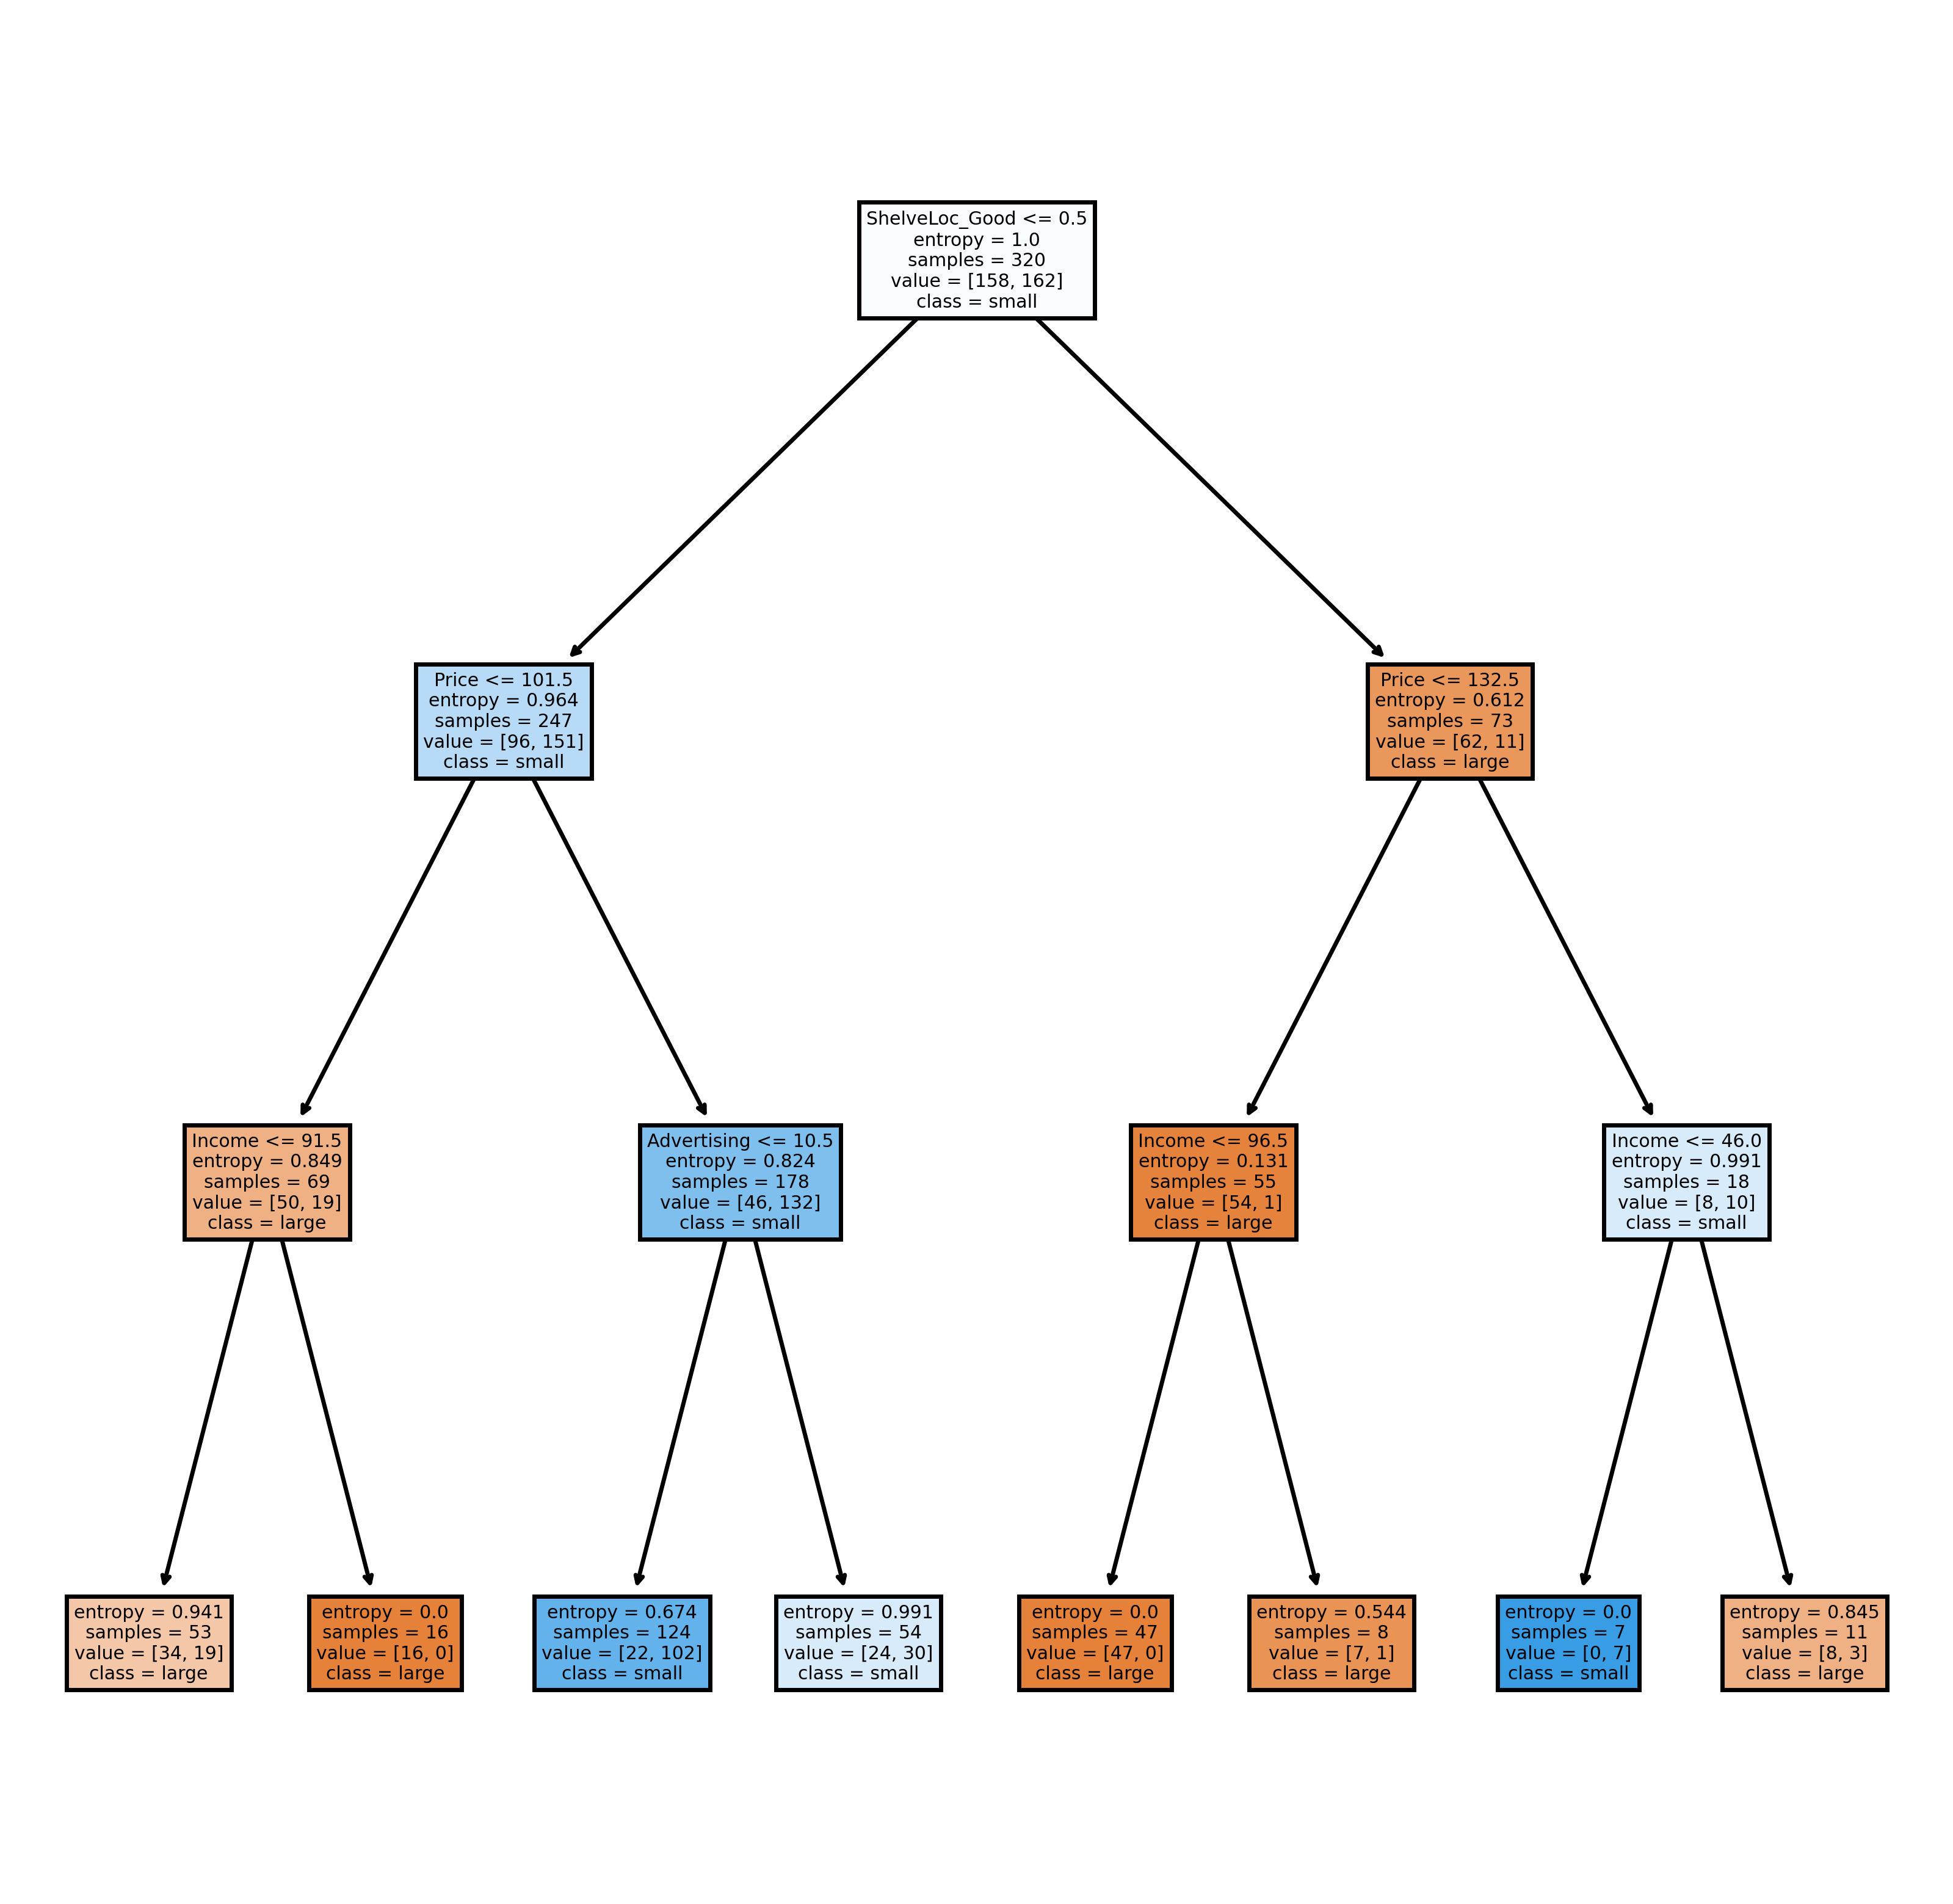

In [37]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'US_No', 'US_Yes', 'Urban_No', 'Urban_Yes',
       'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium']
cn=['large','small']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,8), dpi=500)
tree.plot_tree(model,
              feature_names = fn,
              class_names = cn,
              filled = True);

In [38]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()
preds

array(['large', 'large', 'small', 'small', 'small', 'large', 'large',
       'small', 'large', 'small', 'small', 'small', 'large', 'large',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'large', 'large',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'large', 'large', 'large', 'large', 'small', 'large',
       'large', 'small', 'large', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'large', 'small', 'small', 'large', 'large', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'large',
       'small', 'large', 'small', 'large', 'large', 'small', 'small',
       'small', 'small', 'large'], dtype=object)

In [39]:
pd.crosstab(y_test,preds)

col_0,large,small
sales,,
large,21,20
small,9,30


In [40]:
np.mean(preds==y_test)

0.6375

# GridSearch CV

In [41]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [42]:
pred=model_gini.predict(x_test)

In [43]:
y_test

278    small
341    small
289    large
143    small
57     small
       ...  
185    large
93     large
137    small
202    small
3      small
Name: sales, Length: 80, dtype: object

In [44]:
x_test

,CompPrice,Income,Advertising,Population,Price,Age,Education,US_No,US_Yes,Urban_No,Urban_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
278,114,113,2,129,151,40,15,0,1,1,0,0,1,0
341,98,120,0,268,93,72,10,1,0,1,0,0,0,1
289,143,77,25,448,156,43,17,0,1,0,1,0,0,1
143,122,88,7,36,159,28,17,0,1,0,1,1,0,0
57,93,91,0,22,117,75,11,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,130,100,11,449,107,64,10,0,1,0,1,0,0,1
93,145,30,0,67,104,55,17,1,0,0,1,0,0,1
137,128,42,0,436,118,80,11,1,0,0,1,0,0,1
202,121,78,4,413,130,46,10,0,1,1,0,1,0,0
